In [1]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import categorical_crossentropy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score

In [2]:
def build_model():
    model = Sequential()
    model.add(Dense(4, input_dim=4, activation='sigmoid'))
    model.add(Dense(3, activation='sigmoid'))
    return model
model = build_model()
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [3]:
data = pd.read_csv('iris.data')
print("Rows:",len(data))
print("Classes:",set(data['iris']))
samples = data.to_numpy()[:,:4] 
labels = data.to_numpy()[:,4]
samples = samples.astype(float)
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(labels.shape)
import sklearn.model_selection
(trainSamples, testSamples, trainLabels, testLabels) = sklearn.model_selection.train_test_split(samples, labels)
testSamples.shape

Rows: 150
Classes: {'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}
(150, 3)


(38, 4)

In [5]:
def step(tsamples, tlabels):
    with tf.GradientTape() as tape:
        predictions = model(tsamples)
        loss = categorical_crossentropy(tlabels,predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    grads.append(gradients[2])    
    opt.apply_gradients(zip(gradients, model.trainable_variables))
    return loss.numpy().mean()

Step 0, Loss 1.0962, Accuracy: 0.42
Step 10, Loss 0.6957, Accuracy: 0.61
Step 20, Loss 0.4870, Accuracy: 0.61
Step 30, Loss 0.3579, Accuracy: 0.92
Step 40, Loss 0.2257, Accuracy: 0.97
Step 50, Loss 0.1417, Accuracy: 0.97
Step 60, Loss 0.1012, Accuracy: 0.97
Step 70, Loss 0.0807, Accuracy: 0.97
Step 80, Loss 0.0687, Accuracy: 0.97
Step 90, Loss 0.0610, Accuracy: 0.97


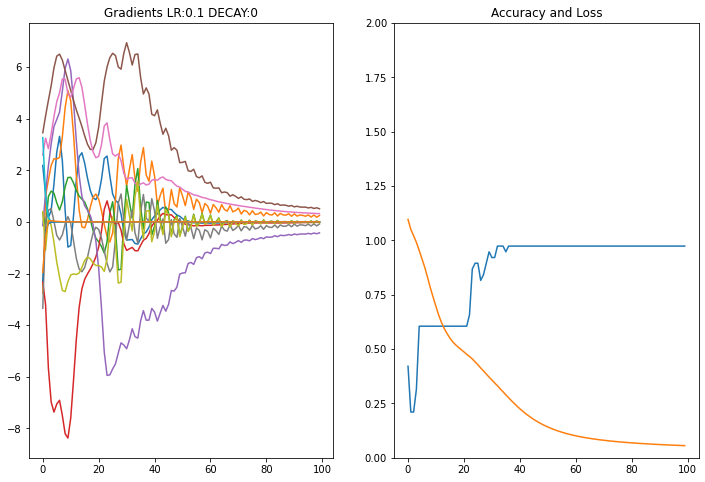

In [6]:
model = build_model()
step_no=0
lr, decay = 0.1,0
#lr,decay = 0.001,0

#lr, decay = 0.2,0.01
#lr, decay = 0.2,0.0
#lr, decay = 0.2,0.5
#lr, decay = 0.5,0.5
#lr, decay = 0.1,0.01
#opt = tf.keras.optimizers.Adam(learning_rate=lr)
opt = tf.keras.optimizers.Adam(learning_rate=lr, decay=decay)

EPOCHS = 100
grads = []
accuracies = []
losses = []
for i in range(EPOCHS):
    loss = step(trainSamples,trainLabels)
    testResults = model.predict(testSamples)
    accuracy = accuracy_score(testLabels.argmax(axis=1), testResults.argmax(axis=1))
    if(i%10 == 0):
        print(f'Step {i}, Loss {loss:.4f}, Accuracy: {accuracy:.2f}')
    accuracies.append(accuracy)
    losses.append(loss)

# create the plots
grads = np.array(grads)
fig=plt.figure(figsize=(12,8))
ax = plt.subplot(1, 2, 1)
plt.plot(grads.reshape(grads.shape[0],-1))
plt.title(f"Gradients LR:{lr} DECAY:{decay}")
ax = plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.plot(losses)
plt.ylim(0,2)
plt.title(f"Accuracy and Loss")

plt.savefig(f"grad_{lr}_{decay}_2.jpg")